In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import sklearn
sklearn.__version__
%matplotlib inline
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
#from sklearn.tree

In [2]:
#columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
#df = pd.read_csv('../cleaned_processed.cleveland.data',header=None,names = columns)
df = pd.read_csv('../housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
dataset = df.values

In [4]:
dataset 

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [5]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [7]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [8]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)


In [9]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.2)

In [10]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1168, 10) (233, 10) (59, 10) (1168,) (233,) (59,)


In [11]:
model = Sequential([
    Dense(12, activation='relu', input_shape=(10,)),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [12]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
hist = model.fit(X_train, Y_train,
          batch_size=12, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
98/98 [==============================] - 2s 17ms/step - loss: 0.6880 - accuracy: 0.5891 - val_loss: 0.6649 - val_accuracy: 0.7425
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6714 - accuracy: 0.6699 - val_loss: 0.6475 - val_accuracy: 0.7639
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.7347 - val_loss: 0.6291 - val_accuracy: 0.7940
Epoch 4/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6360 - accuracy: 0.7360 - val_loss: 0.6084 - val_accuracy: 0.8112
Epoch 5/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6132 - accuracy: 0.7666 - val_loss: 0.5871 - val_accuracy: 0.8069
Epoch 6/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.7581 - val_loss: 0.5647 - val_accuracy: 0.8069
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 0.7742 - val_loss: 0.5412 - val_accuracy: 0.8155
Epoch 8/100


98/98 [==============================] - 0s 3ms/step - loss: 0.2476 - accuracy: 0.9156 - val_loss: 0.2687 - val_accuracy: 0.8712
Epoch 59/100
98/98 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.8986 - val_loss: 0.2676 - val_accuracy: 0.8712
Epoch 60/100
98/98 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.9105 - val_loss: 0.2805 - val_accuracy: 0.8755
Epoch 61/100
98/98 [==============================] - 0s 3ms/step - loss: 0.2367 - accuracy: 0.9001 - val_loss: 0.2690 - val_accuracy: 0.8670
Epoch 62/100
98/98 [==============================] - 0s 3ms/step - loss: 0.2536 - accuracy: 0.9146 - val_loss: 0.2685 - val_accuracy: 0.8670
Epoch 63/100
98/98 [==============================] - 0s 3ms/step - loss: 0.2382 - accuracy: 0.9080 - val_loss: 0.2780 - val_accuracy: 0.8712
Epoch 64/100
98/98 [==============================] - 0s 3ms/step - loss: 0.2280 - accuracy: 0.9135 - val_loss: 0.2738 - val_accuracy: 0.8798
Epoch 65/100
98/98 

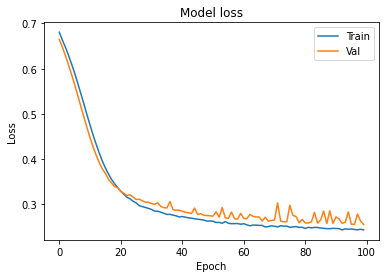

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

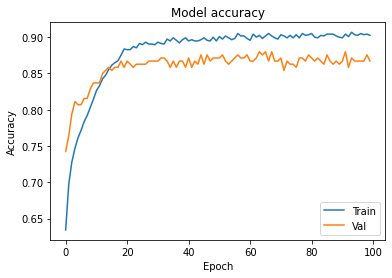

In [15]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [16]:
model.evaluate(X_test, Y_test)[1]

2/2 [==============================] - 0s 3ms/step - loss: 0.2367 - accuracy: 0.8644


0.8644067645072937

In [17]:
model3 = Sequential([
    Dense(62, activation='relu', input_shape=(10,)),
    Dense(62, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [18]:
model3.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
hist3 = model3.fit(X_train, Y_train,
          batch_size=62, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
19/19 [==============================] - 1s 14ms/step - loss: 0.6856 - accuracy: 0.5268 - val_loss: 0.6854 - val_accuracy: 0.4850
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6821 - accuracy: 0.5363 - val_loss: 0.6812 - val_accuracy: 0.5236
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6786 - accuracy: 0.5470 - val_loss: 0.6771 - val_accuracy: 0.5622
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6738 - accuracy: 0.5971 - val_loss: 0.6731 - val_accuracy: 0.5880
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6715 - accuracy: 0.6145 - val_loss: 0.6691 - val_accuracy: 0.6438
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6659 - accuracy: 0.6593 - val_loss: 0.6652 - val_accuracy: 0.6781
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6630 - accuracy: 0.6820 - val_loss: 0.6611 - val_accuracy: 0.6953
Epoch 8/100


19/19 [==============================] - 0s 8ms/step - loss: 0.3888 - accuracy: 0.8755 - val_loss: 0.4007 - val_accuracy: 0.8412
Epoch 59/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3779 - accuracy: 0.8862 - val_loss: 0.3976 - val_accuracy: 0.8498
Epoch 60/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3743 - accuracy: 0.8856 - val_loss: 0.3930 - val_accuracy: 0.8369
Epoch 61/100
19/19 [==============================] - 0s 7ms/step - loss: 0.3775 - accuracy: 0.8665 - val_loss: 0.3900 - val_accuracy: 0.8412
Epoch 62/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3797 - accuracy: 0.8681 - val_loss: 0.3863 - val_accuracy: 0.8412
Epoch 63/100
19/19 [==============================] - 0s 7ms/step - loss: 0.3710 - accuracy: 0.8728 - val_loss: 0.3841 - val_accuracy: 0.8455
Epoch 64/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3690 - accuracy: 0.8747 - val_loss: 0.3804 - val_accuracy: 0.8455
Epoch 65/100
19/19 

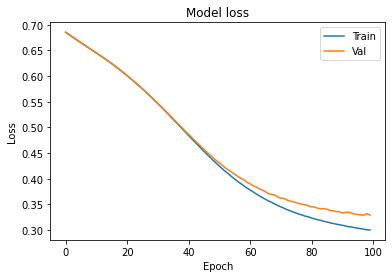

In [20]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

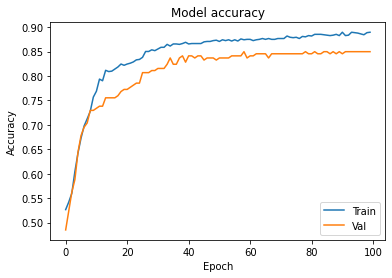

In [21]:
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [22]:
model3.evaluate(X_test, Y_test)[1]

2/2 [==============================] - 0s 4ms/step - loss: 0.3338 - accuracy: 0.8136


0.8135592937469482

In [23]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df2 = pd.read_csv('../cleaned_processed.cleveland.data',header=None,names = columns)
df2.columns
feature = columns[:13]
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [24]:
dataset2 = df2.values

In [25]:
dataset2 

array([[63.,  1.,  1., ...,  0.,  6.,  0.],
       [67.,  1.,  4., ...,  3.,  3.,  1.],
       [67.,  1.,  4., ...,  2.,  7.,  1.],
       ...,
       [68.,  1.,  4., ...,  2.,  7.,  1.],
       [57.,  1.,  4., ...,  1.,  7.,  1.],
       [57.,  0.,  2., ...,  1.,  3.,  1.]])

In [26]:
X2 = dataset2[:,0:13]
Y2 = dataset2[:,13]

In [27]:
min_max_scaler2 = preprocessing.MinMaxScaler()
X_scale2 = min_max_scaler2.fit_transform(X2)

In [28]:
X_scale2

array([[0.70833333, 1.        , 0.        , ..., 1.        , 0.        ,
        0.75      ],
       [0.79166667, 1.        , 1.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.79166667, 1.        , 1.        , ..., 0.5       , 0.66666667,
        1.        ],
       ...,
       [0.8125    , 1.        , 1.        , ..., 0.5       , 0.66666667,
        1.        ],
       [0.58333333, 1.        , 1.        , ..., 0.5       , 0.33333333,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.33333333,
        0.        ]])

In [29]:
X_train2, X_val_and_test2, Y_train2, Y_val_and_test2 = train_test_split(X_scale2, Y2, test_size=0.2)


In [30]:
X_val2, X_test2, Y_val2, Y_test2 = train_test_split(X_val_and_test2, Y_val_and_test2, test_size=0.2)

In [31]:
print(X_train2.shape, X_val2.shape, X_test2.shape, Y_train2.shape, Y_val2.shape, Y_test2.shape)

(237, 13) (48, 13) (12, 13) (237,) (48,) (12,)


In [32]:
model2 = Sequential([
    Dense(12, activation='relu', input_shape=(13,)),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [33]:
model2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
hist2 = model2.fit(X_train2, Y_train2,
          batch_size=12, epochs=100,
          validation_data=(X_val2, Y_val2))

Epoch 1/100
20/20 [==============================] - 1s 12ms/step - loss: 0.7041 - accuracy: 0.5720 - val_loss: 0.7346 - val_accuracy: 0.4375
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7058 - accuracy: 0.5582 - val_loss: 0.7239 - val_accuracy: 0.4792
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7003 - accuracy: 0.5579 - val_loss: 0.7154 - val_accuracy: 0.5000
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.5463 - val_loss: 0.7085 - val_accuracy: 0.5417
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6775 - accuracy: 0.6782 - val_loss: 0.7020 - val_accuracy: 0.5833
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6743 - accuracy: 0.7032 - val_loss: 0.6961 - val_accuracy: 0.6250
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6687 - accuracy: 0.7000 - val_loss: 0.6909 - val_accuracy: 0.6458
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4081 - accuracy: 0.8548 - val_loss: 0.4918 - val_accuracy: 0.8125
Epoch 60/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4125 - accuracy: 0.8594 - val_loss: 0.4900 - val_accuracy: 0.8125
Epoch 61/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4249 - accuracy: 0.8346 - val_loss: 0.4899 - val_accuracy: 0.8125
Epoch 62/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4120 - accuracy: 0.8552 - val_loss: 0.4895 - val_accuracy: 0.7917
Epoch 63/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4320 - accuracy: 0.8320 - val_loss: 0.4866 - val_accuracy: 0.8125
Epoch 64/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4028 - accuracy: 0.8662 - val_loss: 0.4850 - val_accuracy: 0.8125
Epoch 65/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4271 - accuracy: 0.8394 - val_loss: 0.4838 - val_accuracy: 0.8125
Epoch 

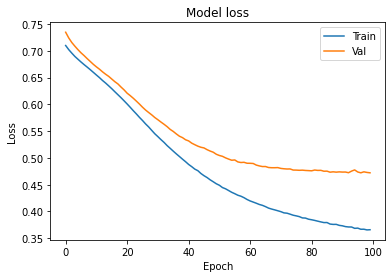

In [35]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

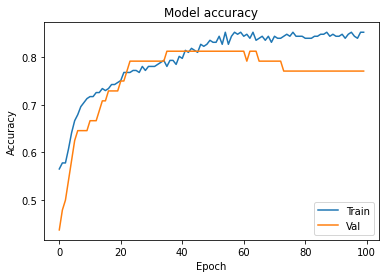

In [45]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [46]:
model2.evaluate(X_test2, Y_test2)[1]

1/1 [==============================] - 0s 29ms/step - loss: 0.3800 - accuracy: 1.0000


1.0

In [38]:
model4 = Sequential([
    Dense(62, activation='relu', input_shape=(13,)),
    Dense(62, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [39]:
model4.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
hist4 = model4.fit(X_train2, Y_train2,
          batch_size=62, epochs=100,
          validation_data=(X_val2, Y_val2))

Epoch 1/100
4/4 [==============================] - 1s 72ms/step - loss: 0.7009 - accuracy: 0.5407 - val_loss: 0.7191 - val_accuracy: 0.4583
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 0.6971 - accuracy: 0.5531 - val_loss: 0.7167 - val_accuracy: 0.4583
Epoch 3/100
4/4 [==============================] - 0s 22ms/step - loss: 0.6963 - accuracy: 0.5580 - val_loss: 0.7142 - val_accuracy: 0.4792
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 0.6962 - accuracy: 0.5564 - val_loss: 0.7119 - val_accuracy: 0.4792
Epoch 5/100
4/4 [==============================] - 0s 22ms/step - loss: 0.6954 - accuracy: 0.5532 - val_loss: 0.7098 - val_accuracy: 0.4792
Epoch 6/100
4/4 [==============================] - 0s 26ms/step - loss: 0.6966 - accuracy: 0.5339 - val_loss: 0.7077 - val_accuracy: 0.5000
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 0.6901 - accuracy: 0.5787 - val_loss: 0.7057 - val_accuracy: 0.5000
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 24ms/step - loss: 0.6193 - accuracy: 0.8403 - val_loss: 0.6319 - val_accuracy: 0.7708
Epoch 60/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6230 - accuracy: 0.8010 - val_loss: 0.6306 - val_accuracy: 0.7708
Epoch 61/100
4/4 [==============================] - 0s 21ms/step - loss: 0.6241 - accuracy: 0.7931 - val_loss: 0.6291 - val_accuracy: 0.7708
Epoch 62/100
4/4 [==============================] - 0s 17ms/step - loss: 0.6137 - accuracy: 0.8161 - val_loss: 0.6278 - val_accuracy: 0.7708
Epoch 63/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6125 - accuracy: 0.8194 - val_loss: 0.6264 - val_accuracy: 0.7917
Epoch 64/100
4/4 [==============================] - 0s 21ms/step - loss: 0.6154 - accuracy: 0.8254 - val_loss: 0.6250 - val_accuracy: 0.7917
Epoch 65/100
4/4 [==============================] - 0s 19ms/step - loss: 0.6149 - accuracy: 0.8211 - val_loss: 0.6236 - val_accuracy: 0.7917
Epoch 66/100
4/4 [========

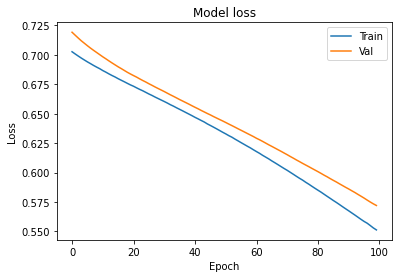

In [41]:
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

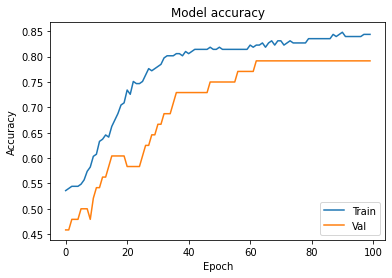

In [42]:
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [43]:
model4.evaluate(X_test2, Y_test2)[1]

1/1 [==============================] - 0s 26ms/step - loss: 0.5855 - accuracy: 0.9167


0.9166666865348816